In [0]:
import torch


In [2]:
#For Kaggle
from google.colab import files
import os
files.upload()
os.system("mkdir -p ~/.kaggle")
os.system("cp kaggle.json ~/.kaggle/")
os.system("chmod 600 ~/.kaggle/kaggle.json")

Saving kaggle.json to kaggle.json


0

In [3]:
!kaggle datasets download -d somnath796/detect-emotions-of-your-favorite-toons

 88% 81.0M/92.2M [00:01<00:00, 39.4MB/s]
100% 92.2M/92.2M [00:01<00:00, 50.4MB/s]


In [0]:
!unzip /content/detect-emotions-of-your-favorite-toons.zip

In [0]:
#Kaggle
filepath = "/content/frames/train_frames"
file_path_train = "/content/96714c94-6-Dataset/Dataset/Train.csv"
root_dir_train = "/content/frames/train_frames"

file_path_test = "/TestingData - Sheet1.csv"
root_dir_test = "/"
#PC
#filepath = "C:\\Users\\ACER\\Desktop\\EmotionDetection\\Dataset\\frames\\train_frames"
#file_path = pd.read_csv('C:\\Users\\ACER\\Desktop\\EmotionDetection\\Dataset\\Train.csv')
#root_dir =  "'C:\\Users\\ACER\\Desktop\\EmotionDetection\\Dataset\\frames\\train_frames"

In [14]:
import glob
image_list = glob.glob('/content/frames/train_frames/*.jpg')
len(image_list)

298

In [0]:
import albumentations as A


In [0]:
encoder = {
    'happy': 0,
    'surprised' : 1,
    'angry': 2,
    'sad': 3,
    'Unknown': 4

}

In [0]:
decoder = {
    0 : 'happy',
    1 : 'surprised' ,
    2 : 'angry',
    3 : 'sad',
    4 : 'Unknown'

}

In [29]:
import torch 
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
from skimage import io, transform
import pandas as pd
import matplotlib.pyplot as plt
from PIL import *

class classDataset(Dataset):
    def __init__(self, csv_file, root_dir, encoder, image_list):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.images_file = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.encoder = encoder
        self.image_list = image_list
 
        self.aug = A.Compose({
        A.Resize(200, 300),
        A.CenterCrop(100, 100),
        A.RandomCrop(80, 80),
        A.HorizontalFlip(p=0.5),
        A.Rotate(limit=(-90, 90)),
        A.VerticalFlip(p=0.5),
        A.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        })

    def __len__(self):
        return len(self.images_file)

    def __getitem__(self, idx):

        image = plt.imread(self.image_list[idx])
        image = Image.fromarray(image).convert('RGB')
        image = self.aug(image=np.array(image))['image']
        image = np.transpose(image, (2, 0, 1)).astype(np.float32)
            
        
        label =  self.images_file.iloc[idx, 1]
        return torch.tensor(image, dtype=torch.float), self.encoder[label]
        #sample = {'image': image, 'label': label}
       

"""train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((300, 300)),
                                        transforms.CenterCrop((100, 100)),
                                        transforms.RandomCrop((80, 80)),
                                        transforms.RandomHorizontalFlip(p=0.5),
                                        transforms.RandomRotation(degrees=(-90, 90)),
                                        transforms.RandomVerticalFlip(p=0.5),
                                        transforms.ToTensor(),
                                        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                        ])"""

'train_transforms = transforms.Compose([\n                                        transforms.ToPILImage(),\n                                        transforms.Resize((300, 300)),\n                                        transforms.CenterCrop((100, 100)),\n                                        transforms.RandomCrop((80, 80)),\n                                        transforms.RandomHorizontalFlip(p=0.5),\n                                        transforms.RandomRotation(degrees=(-90, 90)),\n                                        transforms.RandomVerticalFlip(p=0.5),\n                                        transforms.ToTensor(),\n                                        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))\n                                        ])'

In [0]:
train_files = classDataset(file_path_train, root_dir_train, encoder,image_list)
train_files[0]

In [0]:
train_loader = DataLoader(train_files, shuffle = True, batch_size = 10)

In [0]:
import numpy as np
def show_img(img):
    plt.figure(figsize=(20,20))
    # unnormalize
    img = img / 2 + 0.5  
    npimg = img.numpy()
    npimg = np.clip(npimg, 0., 1.)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

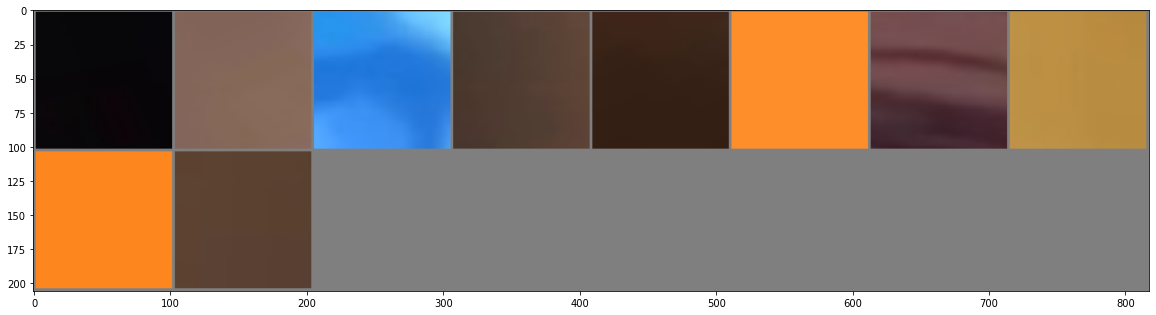

In [34]:
# show images
data = iter(train_loader)
images, labels = data.next()
from PIL import Image
show_img(torchvision.utils.make_grid(images))

In [0]:

train_files = classDataset(file_path_train, root_dir_train, encoder, train_transforms)
test_files = classDataset(file_path_test, root_dir_test, encoder, train_transforms)
train_loader = DataLoader(train_files, shuffle = True, batch_size = 10)
test_loader = DataLoader(test_files, shuffle = True, batch_size = 10)

In [0]:

class AlbumentationImageDataset(Dataset):
    def __init__(self, image_list):
        
        self.image_list = image_list
 
        self.aug = A.Compose({
        A.Resize(200, 300),
        A.CenterCrop(100, 100),
        A.RandomCrop(80, 80),
        A.HorizontalFlip(p=0.5),
        A.Rotate(limit=(-90, 90)),
        A.VerticalFlip(p=0.5),
        A.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        })
         
    def __len__(self):
        return (len(self.image_list))
    
    def __getitem__(self, i):
        image = plt.imread(self.image_list[i])
        image = Image.fromarray(image).convert('RGB')
        image = self.aug(image=np.array(image))['image']
        image = np.transpose(image, (2, 0, 1)).astype(np.float32)
            
        return torch.tensor(image, dtype=torch.float)

In [0]:

train_files = AlbumentationImageDataset(image_list = image_list)
train_loader = DataLoader(dataset=train_files, shuffle = True, batch_size = 10)


In [0]:
from torch import nn
from torchvision import models
class classifie(nn.Module):
    def __init__(self, n_classes, pretrained = True ):
        super(classifie, self).__init__()
        self.cnn_arch = models.resnet18(pretrained = pretrained)
        self.linear1 = nn.Linear(1000,256)
        self.relu = nn.LeakyReLU()
        self.linear2 = nn.Linear(256,n_classes)
        #self.softmax = nn.Softmax(dim=1)
        self.dropout = nn.Dropout(0.7)
   
    def forward(self, input):
        am = self.cnn_arch(input)
        x = self.dropout(self.relu(self.linear1(am)))
        x = self.linear2(x)
        return x

In [36]:
model = classifie(6).cuda()

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


In [0]:
import time
import sys

class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

def train_epoch(model,epoch,data_loader):
    print('Training Epoch {}'.format(epoch))
    batch_time = AverageMeter()
    data_time = AverageMeter()
    losses = AverageMeter()
    accuracies = AverageMeter()
    start_time = time.time()
    end_time = time.time()
    t = []
    batch_size= 10
    criterion = nn.CrossEntropyLoss().cuda()
    optimizer = torch.optim.Adam(model.parameters(),lr = 1e-3)
    for i, (inputs, targets) in enumerate(data_loader):
        data_time.update(time.time() - end_time)
        if torch.cuda.is_available():
            targets = targets.type(torch.cuda.LongTensor)
            inputs = inputs.cuda()
        outputs = model(inputs)    
        loss = criterion(outputs, targets.type(torch.cuda.LongTensor))
        acc = 100 * (outputs.detach().argmax(1) == targets).cpu().numpy().mean()
        losses.update(loss.item(), inputs.size(0))
        accuracies.update(acc, inputs.size(0))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        batch_time.update(time.time() - end_time)
        end_time = time.time()
        sys.stdout.write(
                "\r[Epoch %d] [Batch %d / %d] [Time %.2f %.2f] [Data %.2f %.2f] [Loss: %f, Acc: %.2f%%]"
                % (
                    epoch,
                    i,
                    len(data_loader),
                    batch_time.val,
                    batch_time.avg,
                    data_time.val,
                    data_time.avg,
                    losses.avg,
                    accuracies.avg))
        
        #print('\nEpoch time {} mins'.format((end_time-start_time)/60))
    
    states = {
        'state_dict': model.state_dict(),
        'optim_dict':optimizer.state_dict()
    }
    return losses.avg, accuracies.avg
   



In [38]:
epoch = 10
for i in range ( 0, epoch):
  value = train_epoch(model, i, train_loader)

Training Epoch 0
[Epoch 0] [Batch 29 / 30] [Time 0.14 0.18] [Data 0.12 0.15] [Loss: 2.416046, Acc: 24.83%]Training Epoch 1
[Epoch 1] [Batch 29 / 30] [Time 0.13 0.17] [Data 0.12 0.15] [Loss: 2.191307, Acc: 29.87%]Training Epoch 2
[Epoch 2] [Batch 29 / 30] [Time 0.14 0.17] [Data 0.12 0.15] [Loss: 1.885505, Acc: 29.19%]Training Epoch 3
[Epoch 3] [Batch 29 / 30] [Time 0.14 0.17] [Data 0.12 0.15] [Loss: 1.843139, Acc: 31.54%]Training Epoch 4
[Epoch 4] [Batch 29 / 30] [Time 0.14 0.17] [Data 0.12 0.15] [Loss: 1.713925, Acc: 32.55%]Training Epoch 5
[Epoch 5] [Batch 29 / 30] [Time 0.13 0.17] [Data 0.12 0.15] [Loss: 1.693530, Acc: 32.21%]Training Epoch 6
[Epoch 6] [Batch 29 / 30] [Time 0.14 0.17] [Data 0.12 0.15] [Loss: 1.628114, Acc: 35.57%]Training Epoch 7
[Epoch 7] [Batch 29 / 30] [Time 0.14 0.17] [Data 0.13 0.15] [Loss: 1.602912, Acc: 37.58%]Training Epoch 8
[Epoch 8] [Batch 29 / 30] [Time 0.15 0.17] [Data 0.12 0.15] [Loss: 1.565191, Acc: 38.93%]Training Epoch 9
[Epoch 9] [Batch 29 / 30] [Ti

In [0]:
PATH = '/content/model.pth'
torch.save(model.state_dict(), PATH)

In [40]:

model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [0]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images,labels = images.to('cuda'),labels.to('cuda')

In [0]:
outputs = model(images)

In [45]:
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data[0].to('cuda'), data[1].to('cuda')
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network test images: %d %%' % (
    100 * correct / total))

Accuracy of the network test images: 37 %
